In [1]:
#IMPORTAR BIBLIOTECAS DO PROJETO
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


In [2]:
base_credito = pd.read_csv('credit_data.csv')

Tratamento de De valores incosistentes 

In [7]:
base_credito.loc[base_credito['age']<0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [9]:
base_credito_2 = base_credito.drop('age', axis= 1)
base_credito_2

,clientid,income,loan,default
0,1,66155.925095,8106.532131,0
1,2,34415.153966,6564.745018,0
2,3,57317.170063,8020.953296,0
3,4,42709.534201,6103.642260,0
4,5,66952.688845,8770.099235,1
...,...,...,...,...
1995,1996,59221.044874,1926.729397,0
1996,1997,69516.127573,3503.176156,0
1997,1998,44311.449262,5522.786693,1
1998,1999,43756.056605,1622.722598,0


In [11]:
base_credito.index

RangeIndex(start=0, stop=2000, step=1)

In [13]:
base_credito[base_credito['age']<0].index

Int64Index([15, 21, 26], dtype='int64')

In [16]:
base_credito_3 = base_credito.drop(base_credito[base_credito['age']<0].index)
base_credito_3


,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [18]:
base_credito_3.loc[base_credito['age']<0]

,clientid,income,age,loan,default


In [19]:
base_credito.mean()

clientid     1000.500000
income      45331.600018
age            40.807559
loan         4444.369695
default         0.141500
dtype: float64

In [21]:
base_credito['age'].mean()

40.80755937840458

In [22]:
base_credito['age'][base_credito['age']>0].mean()

40.92770044906149

In [23]:
base_credito.loc[base_credito['age']<0, 'age'] = 40.92

In [24]:
base_credito.loc[base_credito['age']<0, 'age']

Series([], Name: age, dtype: float64)

In [25]:
base_credito.head(9)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0


# Tratamento de valores faltantes

In [26]:
base_credito.isnull()

,clientid,income,age,loan,default
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1995,False,False,False,False,False
1996,False,False,False,False,False
1997,False,False,False,False,False
1998,False,False,False,False,False


In [28]:
base_credito.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [29]:
base_credito.loc[pd.isnull(base_credito['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [30]:
base_credito['age'].fillna(base_credito['age'].mean(), inplace= True)

In [31]:
base_credito.loc[pd.isnull(base_credito['age'])]

,clientid,income,age,loan,default


In [32]:
base_credito.loc[(base_credito['clientid'] == 29) | (base_credito['clientid'] == 31) | (base_credito['clientid'] == 32)]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


In [33]:
base_credito.loc[(base_credito['clientid'].isin([29,31,32]))]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


# Divisão entre previsores e classe

In [34]:
type(base_credito)

pandas.core.frame.DataFrame

In [36]:
x_credito = base_credito.iloc[:,1:4].values

In [37]:
x_credito

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [38]:
type(x_credito)

numpy.ndarray

In [43]:
y_credito = base_credito.iloc[:,4].values

In [44]:
y_credito

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [45]:
type(y_credito)

numpy.ndarray

# Escalonamento dos valores

In [47]:
x_credito[:,0].min(), x_credito[:,1].min(), x_credito[:,2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [48]:
x_credito[:,0].max(), x_credito[:,1].max(), x_credito[:,2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

In [49]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler_credito =  StandardScaler()

In [52]:
x_credito = scaler_credito.fit_transform(x_credito)

In [53]:
#dados taransformados
x_credito[:,0].min(), x_credito[:,1].min(), x_credito[:,2].min()

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [54]:
# dados transformados
x_credito[:,0].max(), x_credito[:,1].max(), x_credito[:,2].max()

(1.7220222385319197, 1.7393673928651967, 3.0616609141708273)

In [55]:
x_credito

array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]])

# Divisão das bases em treinamento e teste

In [56]:
#Divisão das bases em treinamento e teste
from sklearn.model_selection import train_test_split

In [57]:
x_credito_treinamento, x_credito_teste, y_credito_treinamento, y_credito_teste = train_test_split(
    x_credito, y_credito, test_size= 0.25, random_state= 0)

In [59]:
x_credito_treinamento.shape

(1500, 3)

In [60]:
y_credito_treinamento.shape

(1500,)

In [61]:
x_credito_teste.shape, y_credito_teste.shape

((500, 3), (500,))

# Salvar variáveis

In [63]:
import pickle

In [66]:
with open('credito.pkl', mode='wb') as f:
    pickle.dump([x_credito_treinamento, y_credito_treinamento, x_credito_teste, y_credito_teste], f)

# Aplicando modelagem estatítica Naive Bayes(Risco de credito)

In [89]:
from sklearn.naive_bayes import GaussianNB

In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
base_risco_credito = pd.read_csv('risco_credito.csv')

In [92]:
x_risco_credito = base_risco_credito.iloc[:,0:4].values
x_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [93]:
y_risco_credito = base_risco_credito.iloc[:,4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [94]:
Label_Encoder_historia = LabelEncoder()
Label_Encoder_divida = LabelEncoder()
Label_Encoder_garantia = LabelEncoder()
Label_Encoder_renda = LabelEncoder()

In [95]:
x_risco_credito[:,0] = Label_Encoder_historia.fit_transform(x_risco_credito[:,0])
x_risco_credito[:,1] = Label_Encoder_divida.fit_transform(x_risco_credito[:,1]) 
x_risco_credito[:,2] = Label_Encoder_garantia.fit_transform(x_risco_credito[:,2]) 
x_risco_credito[:,3] = Label_Encoder_renda.fit_transform(x_risco_credito[:,3]) 

In [96]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [97]:
import pickle
with open('risco_credito.pkl', 'wb') as f:
    pickle.dump([x_risco_credito, y_risco_credito], f)

In [98]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(x_risco_credito, y_risco_credito)

GaussianNB()

In [99]:
# história boa (0), dívida alta (0), garantias nenhuma (1), renda > 35 (2)
# história ruim (2), dívida alta (0), garantias adequada (0), renda < 15 (0)
prever = naive_risco_credito.predict([[0,0,1,2],[2,0,0,0]])

In [100]:
prever

array(['baixo', 'moderado'], dtype='<U8')

In [101]:
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [102]:
naive_risco_credito.class_count_

array([6., 5., 3.])

In [103]:
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

# Aplicando modelagem estatítica Naive Bayes(Base de credito)

In [104]:
with open('credito.pkl','rb') as f:
    x_credito_treinamento, y_credito_treinamento, x_credito_teste, y_credito_teste = pickle.load(f)

In [107]:
x_credito_treinamento.shape, y_credito_teste.shape

((1500, 3), (500,))

In [108]:
x_credito_teste.shape, y_credito_teste.shape

((500, 3), (500,))

In [113]:
naive_credito_dados = GaussianNB()
naive_credito_dados.fit(x_credito_treinamento, y_credito_treinamento)

GaussianNB()

In [115]:
prever_credito = naive_credito_dados.predict(x_credito_teste)

In [116]:
prever_credito

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [117]:
y_credito_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [121]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [122]:
accuracy_score(prever_credito, y_credito_teste)

0.938

In [123]:
confusion_matrix(prever_credito, y_credito_teste)

array([[428,  23],
       [  8,  41]], dtype=int64)

In [124]:
from yellowbrick.classifier import ConfusionMatrix

0.938

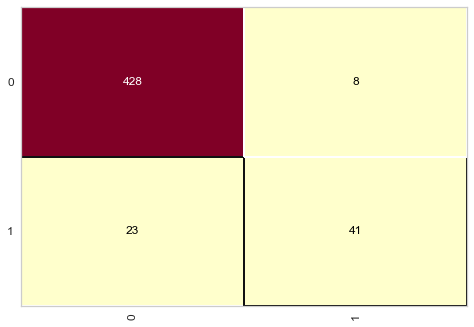

In [126]:
cvm = ConfusionMatrix(naive_credito_dados)
cvm.fit(x_credito_treinamento, y_credito_treinamento)
cvm.score(x_credito_teste, y_credito_teste)

In [127]:
print(classification_report(prever_credito,y_credito_teste))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       451
           1       0.64      0.84      0.73        49

    accuracy                           0.94       500
   macro avg       0.81      0.89      0.85       500
weighted avg       0.95      0.94      0.94       500

